In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
from jax import vmap, jit
import jax.numpy as jnp
from pathlib import Path
import numpy as np
from einops import rearrange
import jax
import matplotlib.pyplot as plt
import seaborn as sns
from hflow.misc.plot import scatter_movie, imshow_movie

In [73]:
from hflow.data.ip import get_inertial_partices
key = jax.random.key(1)
n_samples = 4096
sols, train_mus, t_eval = get_inertial_partices(key, n_samples, train=True)


In [83]:
from hflow.misc.plot import scatter_movie


scatter_movie(sols[7])

In [ ]:
from hflow.run import build
from hflow.io.load import load_single

cfg, df = load_single('ip', 'ONmD_174258532272')
    
key, train_data, test_data, loss_fn, arg_fn, s_fn, params_init = build(cfg)

In [85]:
df['train_mus_raw']

array([0.01      , 0.01359356, 0.0184785 , 0.02511886, 0.03414549,
       0.04641589, 0.06309573, 0.08576959, 0.11659144, 0.15848932,
       0.21544347, 0.29286446, 0.39810717, 0.54116953, 0.73564225,
       1.        ])

In [168]:
from hflow.misc.jax import randkey

sols_sample, mu_sample, t_sample, quad_weights = arg_fn(randkey())

In [169]:
(mu_shift, mu_scale) = df ['mu_norm'] 

train_mus , (mu_sample * mu_scale) + mu_shift

(Array([0.01      , 0.01359356, 0.0184785 , 0.02511886, 0.03414549,
        0.04641589, 0.06309573, 0.08576959, 0.11659144, 0.15848932,
        0.21544347, 0.29286446, 0.39810717, 0.54116953, 0.73564225,
        1.        ], dtype=float64),
 Array([[0.08576959]], dtype=float64))

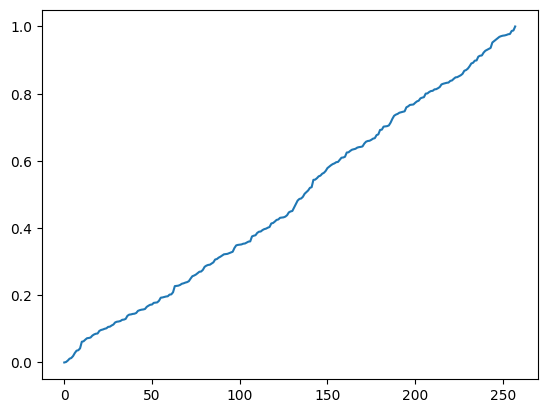

In [170]:
plt.plot(t_sample)
plt.show()

In [172]:
sols_sample.shape

(258, 512, 2)

In [171]:
scatter_movie(sols_sample)